In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import GaussianModel, ExponentialModel, \
                         ThermalDistributionModel, StepModel #Modelli vari, l'ultimo è Fermi (o Bose)

In [2]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values


def rebin(data, factor):
    if len(data) % factor != 0:
        raise ValueError("Length of data must be divisible by factor.")
    rebinned_data = np.sum(data.reshape(-1, factor), axis=1)
    return rebinned_data

(400,) (400,)
(400,) (400,)


Text(0, 0.5, 'counts')

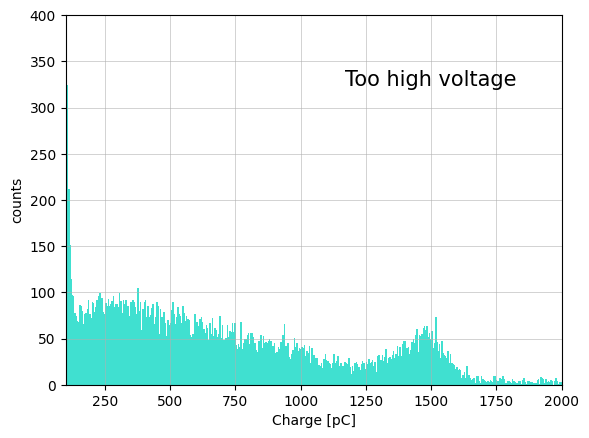

In [49]:
PATH_MARTI="../Dati/high_voltage.dat"
edge_N, bin_N = load_histo(PATH_MARTI)
edge_N=edge_N[0]
bin_N=bin_N[0]
print(edge_N.shape, bin_N.shape)
centers_N = edge_N
print(centers_N.shape, bin_N.shape)

lim_N = [100, 2000]
plt.text(centers_N.min()*(-1) * 0.75, bin_N.max() * 60 / 100, f'Too high voltage', fontsize=15, color='black', ha='center')
plt.bar(centers_N*(-1), bin_N, width = 6, color='turquoise')
plt.xlim(lim_N)
plt.ylim(0, 400)
plt.grid(linewidth=0.4)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

(400,) (400,)
(400,) (400,)


Text(0, 0.5, 'counts')

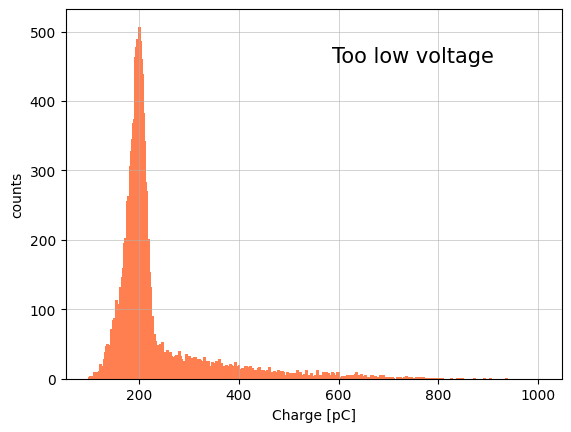

In [48]:
PATH_MARTI="../Dati/low_tension.dat"
edge_N, bin_N = load_histo(PATH_MARTI)
edge_N=edge_N[0]
bin_N=bin_N[0]
print(edge_N.shape, bin_N.shape)
centers_N = edge_N
print(centers_N.shape, bin_N.shape)

lim_N = [100, 2000]
plt.text(centers_N.min()*(-1) * 0.75, bin_N.max() * 90 / 100, f'Too low voltage', fontsize=15, color='black', ha='center')
plt.bar(centers_N*(-1), bin_N, width = 6, color='coral')
#plt.xlim(lim_N)
plt.grid(linewidth=0.4)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

In [ ]:
PATH_MARTI="../Dati/Low_tension.dat"
#PATH_SAM="../Dati/Run_allch_TEST_7M_4_12_2024.dat"
edge_N, bin_N = load_histo(PATH_MARTI)

channel = 4

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 11, 12]

    
edge_N = edge_N[channel_idx[channel]]
bin_N = bin_N[channel_idx[channel]]

rebin_fact = 1

#if channel == 5:
    #rebin_fact = 2
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)

In [ ]:
lim_list = [[-550, -165],  #ch0
            [-1, -1],      #ch1
            [-550, -175],  #ch2
            [-600, -145],  #ch3
            [-500, -165],  #ch4
            [-600, -175],  #ch5
            [-550, -155],  #ch6
            [-500, -180],  #ch7
            [-600, -170],  #ch8
            [-600, -160],  #ch9
            [-600, -130],  #ch10
            [-600, -165],  #ch11
            [-1, -1],      #ch12
            [-1, -1],      #ch13
            [-600, -140],  #ch14
            [-600, -160]   #ch15
            ]


lim_N = lim_list[channel]
plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")